In [2]:
from langgraph.graph import StateGraph,END
import random
from typing import Dict,List,Any,TypedDict

In [3]:
class AgentState(TypedDict):
    name:str
    number:List[int]
    counter:int

In [4]:
# greeting node

def greeting_node(state:AgentState) -> AgentState:
    state["name"] = f"Hi there,,{state["name"]}"
    state["counter"] = 0

    return state

def random_node(state:AgentState) -> AgentState:
    """Randomly select a number from the list and add it to the counter.
    """
    state["number"].append(random.randint(0,10))
    state["counter"] += 1

    return state

def should_continue(state:AgentState) -> bool:
    """Function to decide what to do next"""
    if state["counter"] < 5:
        print("ENTERING LOOP",state["counter"])
        return "loop"    
    else:
        return "exit"
    




In [6]:
graph = StateGraph(AgentState)
graph.add_node("greeting_node", greeting_node)
graph.add_node("random_node", random_node)
graph.add_edge("greeting_node", "random_node")

graph.add_conditional_edges(
    "random_node",
    should_continue,
    {
        "loop":"random_node",
        "exit":END
    }
)

graph.set_entry_point("greeting_node")

app = graph.compile()


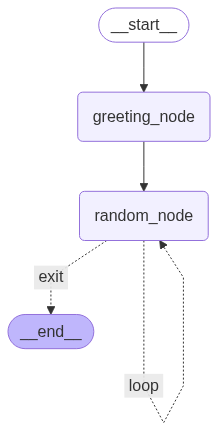

In [7]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
app.invoke({"name":"Vanshika","number":[],"counter":-1})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there,,Vanshika', 'number': [4, 9, 4, 3, 10], 'counter': 5}